In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor



sns.set(style="whitegrid")


In [2]:
df=pd.read_csv(r"D:\project\PRCP-1018-BikeRental (1)-to work\Data\day.csv")
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [3]:
df['dteday']=pd.to_datetime(df['dteday'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [4]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed']
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for col in cat_cols:
    df[col]=df[col].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

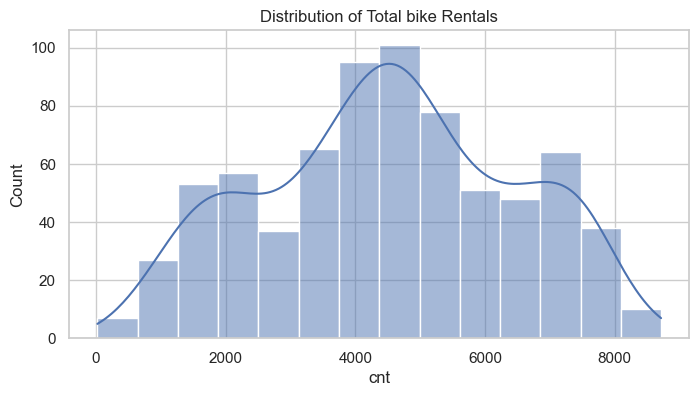

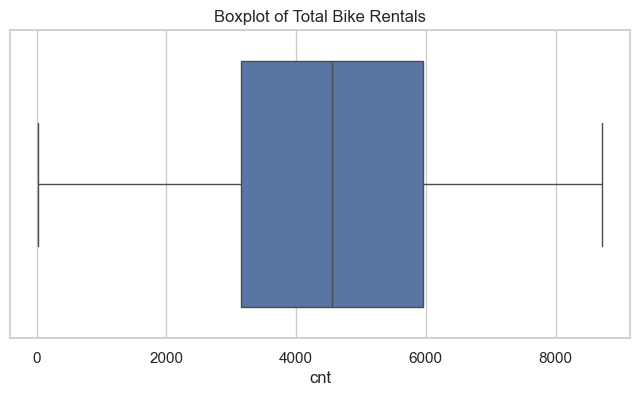

In [32]:
#Histogram
plt.figure(figsize=(8,4))
sns.histplot(df['cnt'],kde=True)
plt.title('Distribution of Total bike Rentals')
plt.show()
df['cnt'].describe()
df['cnt'].skew()

#Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=df['cnt'])
plt.title("Boxplot of Total Bike Rentals")
plt.show()







In [37]:

df['cnt'].kurtosis()


np.float64(-0.8119223847191548)

In [5]:
#IQR
Q1=df['cnt'].quantile(0.25)
Q3=df['cnt'].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

((df['cnt']<lower_limit)|(df['cnt']>upper_limit)).sum()

np.int64(0)

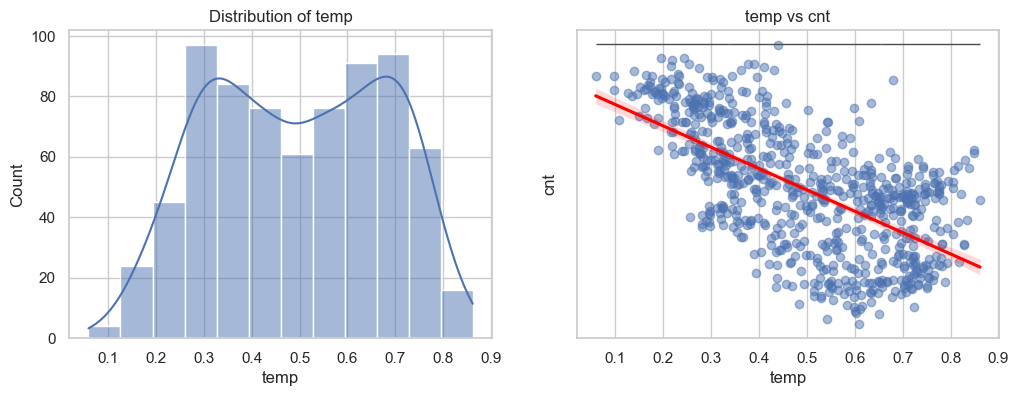

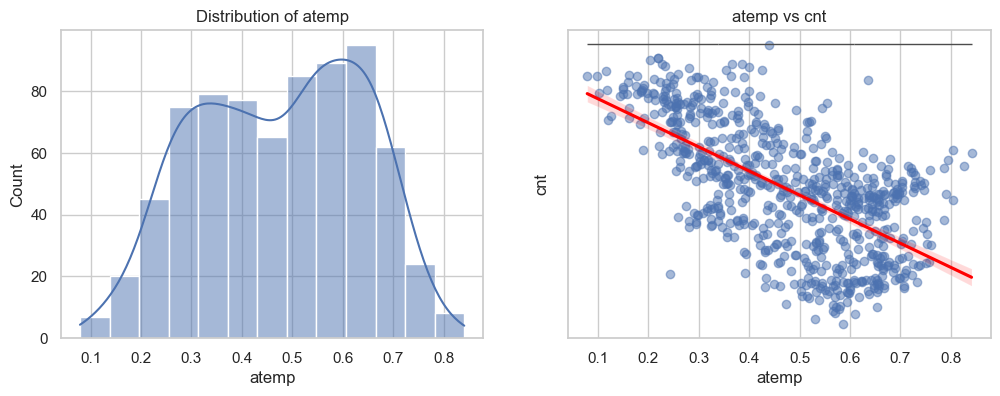

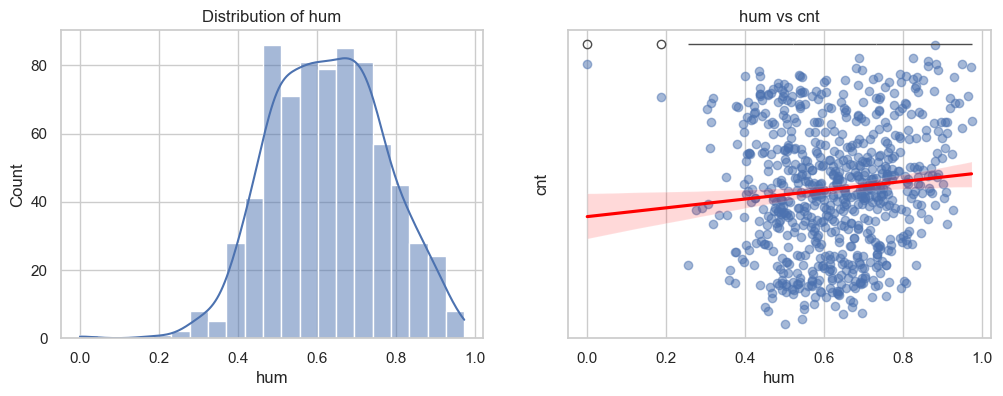

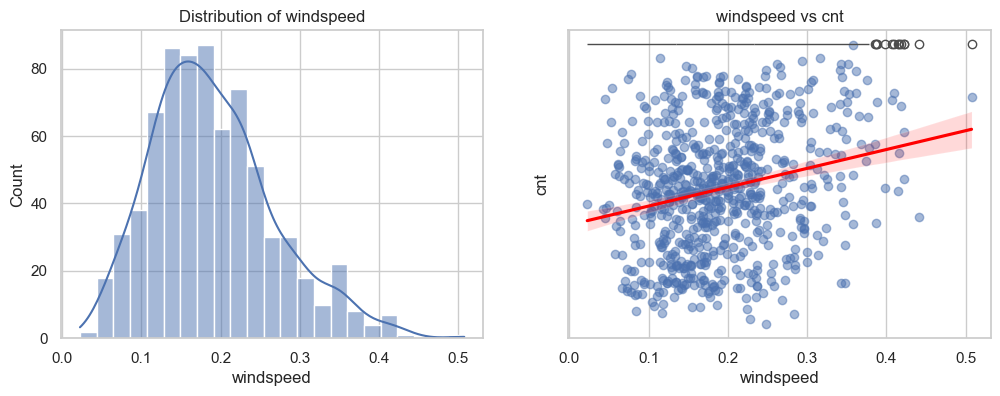

In [6]:
#numeric features- univariate
num_cols=['temp','atemp','hum', 'windspeed']
for col in num_cols:
    plt.figure(figsize=(12,4))
    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    #Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
#bi
    # Scatter plot (reg line)
    sns.regplot(x=col, y='cnt', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'{col} vs cnt')
    plt.xlabel(col)
    plt.ylabel('cnt')
    
    plt.show()


In [46]:
df['hum'].skew()


np.float64(-0.06978343399095213)

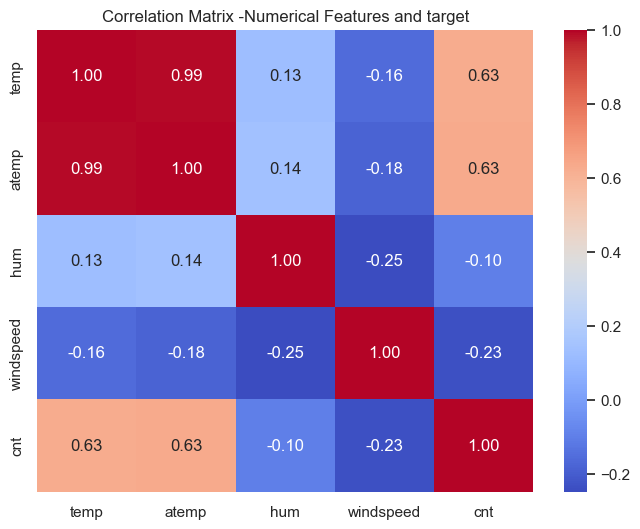

In [59]:
plt.figure(figsize=(8,6))
corr_matrix = df[num_cols + ['cnt']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Numerical Features and target')
plt.show()


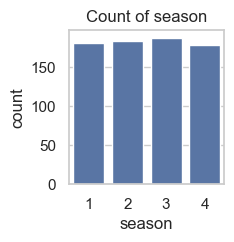

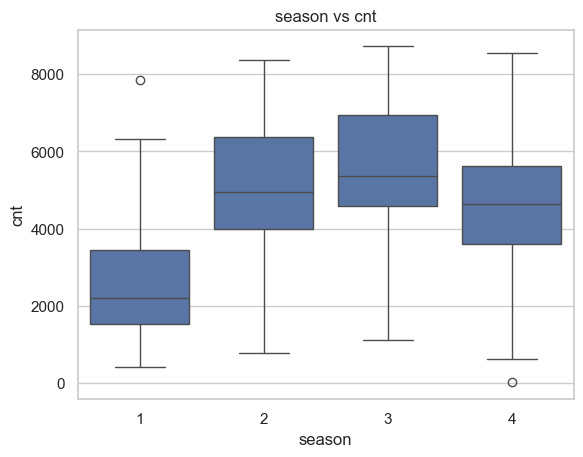

Mean cnt per season:
season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64
--------------------------------------------------


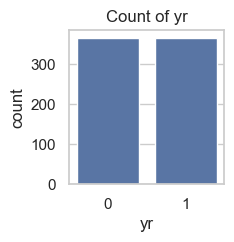

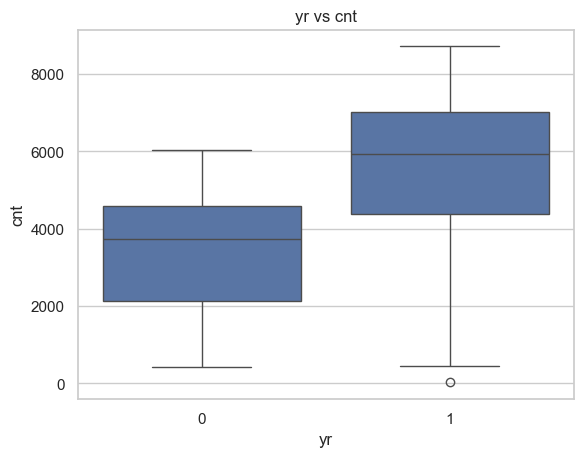

Mean cnt per yr:
yr
0    3405.761644
1    5599.934426
Name: cnt, dtype: float64
--------------------------------------------------


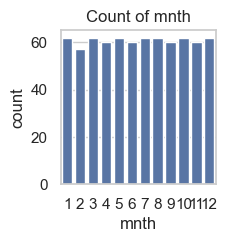

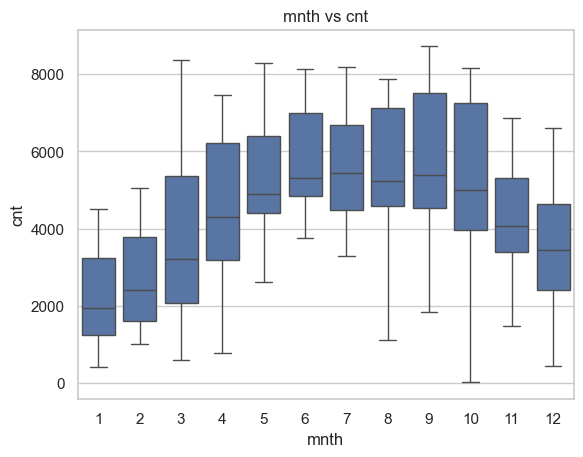

Mean cnt per mnth:
mnth
1     2176.338710
2     2655.298246
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64
--------------------------------------------------


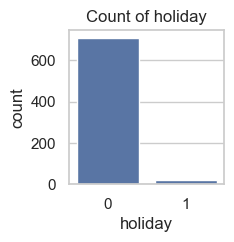

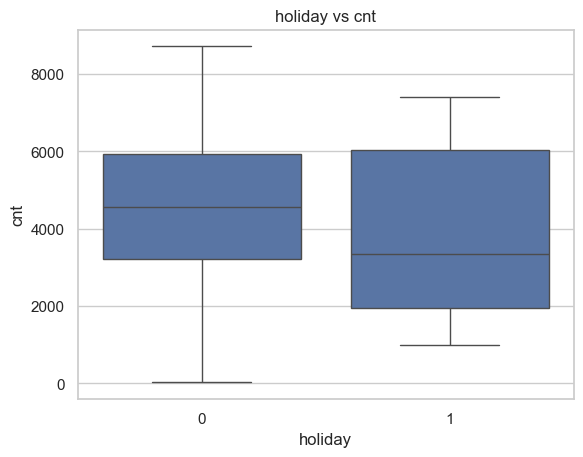

Mean cnt per holiday:
holiday
0    4527.104225
1    3735.000000
Name: cnt, dtype: float64
--------------------------------------------------


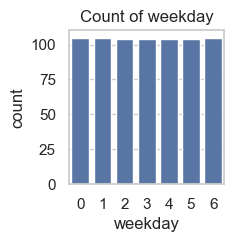

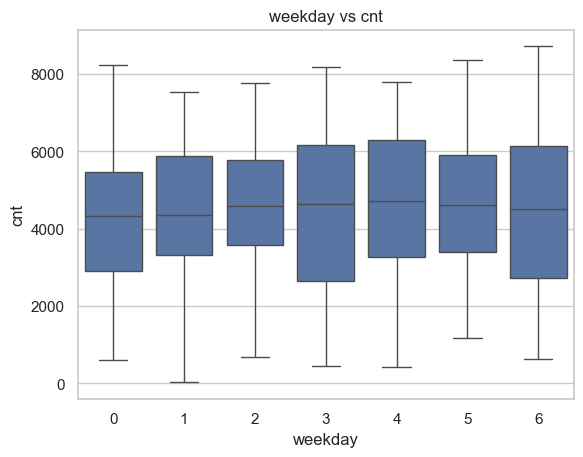

Mean cnt per weekday:
weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64
--------------------------------------------------


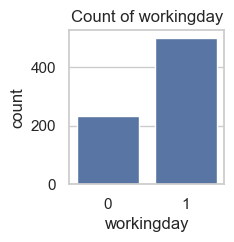

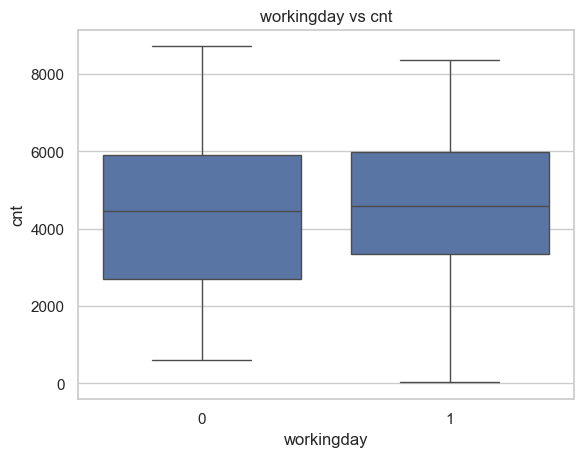

Mean cnt per workingday:
workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64
--------------------------------------------------


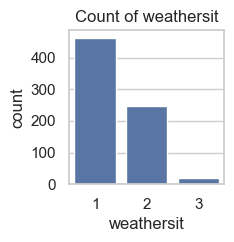

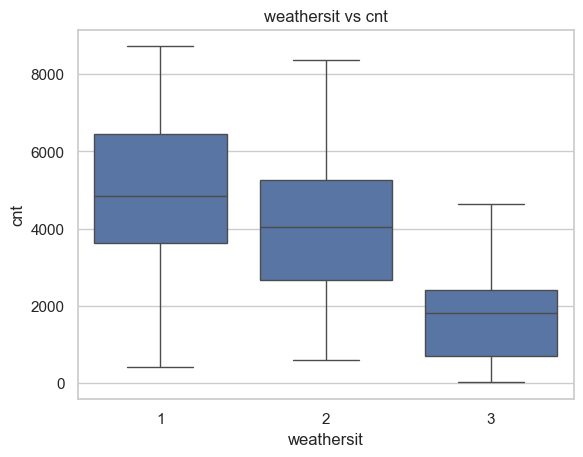

Mean cnt per weathersit:
weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64
--------------------------------------------------


In [8]:
#categories distribution
for col in cat_cols:
    plt.figure(figsize=(2,2))

    #countplot
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.show()

    #Boxplot- effect on target-bivariate
    sns.boxplot(x=col, y='cnt', data=df)
    plt.title(f'{col} vs cnt')
    plt.show()

    # Numeric summary with observed=True
    print(f'Mean cnt per {col}:')
    print(df.groupby(col, observed=True)['cnt'].mean())
    print('-'*50)

   
  



In [ ]:

def numeric_analysis(df, dataset_name):
    for col in num_cols:
        plt.figure(figsize=(12,4))
        
        # Histogram 
        plt.subplot(1,2,1)
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f'{col} Distribution ({dataset_name})')
        plt.xlabel(col)
        
        # Boxplot
        plt.subplot(1,2,2)
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f'{col} Boxplot ({dataset_name})')
        plt.xlabel(col)
        
        plt.tight_layout()
        plt.show()
        
        # Scatter plot 
        plt.figure(figsize=(6,4))
        sns.regplot(x=col, y='cnt', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
        plt.title(f'{col} vs cnt ({dataset_name})')
        plt.xlabel(col)
        plt.ylabel('cnt')
        plt.show()
        
        # Correlation with target
        corr = df[col].corr(df['cnt'])
        print(f"{dataset_name} - Correlation of {col} with cnt: {corr:.2f}\n")
